### Imbalanced Dataset


- **Fraud Detection** is a common problem in ML field.
- When we train our model with a **Training** set for **Fraud** transaction, in most of the cases there will be `10000` good transactions and `1` bad transaction.
- This creates an **Imbalance** in the dataset, and even with a python prediction function like below which will return `False` all the time that will also give a `99%` **Accuracy**, as majority of the transactions are not **Fraud**.
> def detect_fraud(transaction):
>      return False
- So as here our motive is to find the **Fraud Transactions** the function with a `99%` **Accuracy** is performing horribly.
- There are ways to handle these kind of **Imbalances** in the field of ML:
  - **Under Sampling**
  - **Oversampling** also called as **Blind Copy**
  - **Ensemble**
  - **Focal Loss**
  
  
<hr style="border:2px solid black">

#### `Under Sampling` majority class

- Suppose there is a scenario where `99000` are **Good** and `1000` are **Fraud** transactions.
- To tackle this **Imbalance** we can take `1000` random samples from the `99000` samples and discard the rest samples. Then combine this `1000` samples with the `1000` **Fraud** samples and then train the ML model.

<img src="images/US1.png" width=600>

- This is not a good practice as most of the samples got wasted.

<hr style="border:2px solid black">

#### `Over Sampling` minority class by duplication

- Here duplicate the `1000` **Fraud** transactions for `99` times to create `99000` samples.
- Then train the ML model with these new dataset combined of `99000` **Good** and **Fraud** transactions.

<img src="images/OS1.png" width=800>

- There is another better way.

<hr style="border:2px solid black">

#### `Over Sampling` minority class using `SMOTE`

- Here we do `Over Sampling` with a technique called **SMOTE (Synthetic Minority Over-sampling Technique)**.
- Here **K-Nearest Neighbor** algorithm gets used to try to produce synthetic samples from the `1000` samples.

<img src="images/OS2.png" width=800>

- In **Python** there is a module named **Imblearn** which can be used for **SMOTE**.

<hr style="border:2px solid black">

#### `Ensemble` method

- Here let's say we have `3000` transactions in one class and `1000` in another class.
- Here we can divide these `3000` transactions in `3` batches.
- Then combine it with the `1000` transactions of other class and create and train one ML model.
- Do the same for the other `2` batches as well and create `2` other ML models.
- Now take a **Majority Vote** of all these ML models.

<img src="images/ES1.png" width=800>

- It is more like the **Random Forest** model.

<hr style="border:2px solid black">

#### `Focal Loss`

- It is a special kind of loss function that will penalize the majority samples during loss calculations and give more weightage to the minority sample class.
- Read the article below to get more details about the concept:
- https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7#:~:text=Focal%20loss%20is%20very%20useful,is%20simple%20and%20highly%20effective

<hr style="border:2px solid black">

##### Handling imbalanced data in customer churn prediction

- **Customer churn** prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score.
- We use this in `08.ANN prediction` but there we find a problem where the `f1 score` for the `1` was very low, although the `accuracy` was ok. But in this type of scenario the `f1 score` of individual classes should be high.

> <img src="images/f1.png" width=600>

- Here our goal will be to improve the `f1 score` for the class `1`.

<hr style="border:2px solid black">

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset

df = pd.read_csv("data/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
5162,4801-KFYKL,Male,0,No,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,159.2,No
6906,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
1234,4525-VZCZG,Male,0,No,Yes,54,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,105.85,5826.65,No
1743,3768-VHXQO,Male,0,Yes,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.85,1583.5,No


In [3]:
# Checking value counts for "Yes" and "No"

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**First of all, drop `customerID` column as it is of no use**

In [4]:
df.drop('customerID', axis=1, inplace=True)
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
416,Male,0,Yes,No,70,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),98.70,6858.9,No
879,Male,0,No,No,33,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.65,1665.2,No
3059,Female,0,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.05,1559.15,No
5307,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.10,90.1,No
5433,Male,0,No,No,55,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,100.90,5552.05,No
3182,Female,0,Yes,No,45,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),95.20,4285.8,No
4337,Female,1,No,No,71,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.65,6951.15,No
3034,Male,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,84.50,84.5,Yes
3342,Male,0,No,No,40,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),62.05,2511.55,No
655,Male,0,No,No,10,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.10,865.1,No


In [5]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Notes:**

- The `MonthlyCharges` is of `float` type but the `TotalCharges` is of `object` type.
- So we need to transform `TotalCharges` to `float` type.

In [6]:
# Checking if there is any null values in the column "TotalCharges"

df.TotalCharges.isna().sum()

0

In [7]:
# Let's find the rows with the blank spaces
# It will display the rows where the condition will be true

df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Let's see how many rows have the problem of blank spaces

df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

In [9]:
# Remove rows with space in TotalCharges
# Here we storing the new dataframe
# It shows 11 rows less than the original dataset

df1 = df[df.TotalCharges != ' ']
df.shape, df1.shape

((7043, 20), (7032, 20))

In [10]:
# Checking the datatype of the concerned column in the new dataframe

df1.TotalCharges.dtypes

dtype('O')

In [11]:
# Now again transforming the "TotalCharges" column as float data type 

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

dtype('float64')

In [12]:
# Checking the info again

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


**Notes:**

- So now we have achieved the change we wanted.

In [13]:
# Checking which customers are not leaving


df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


#### Data Visualization

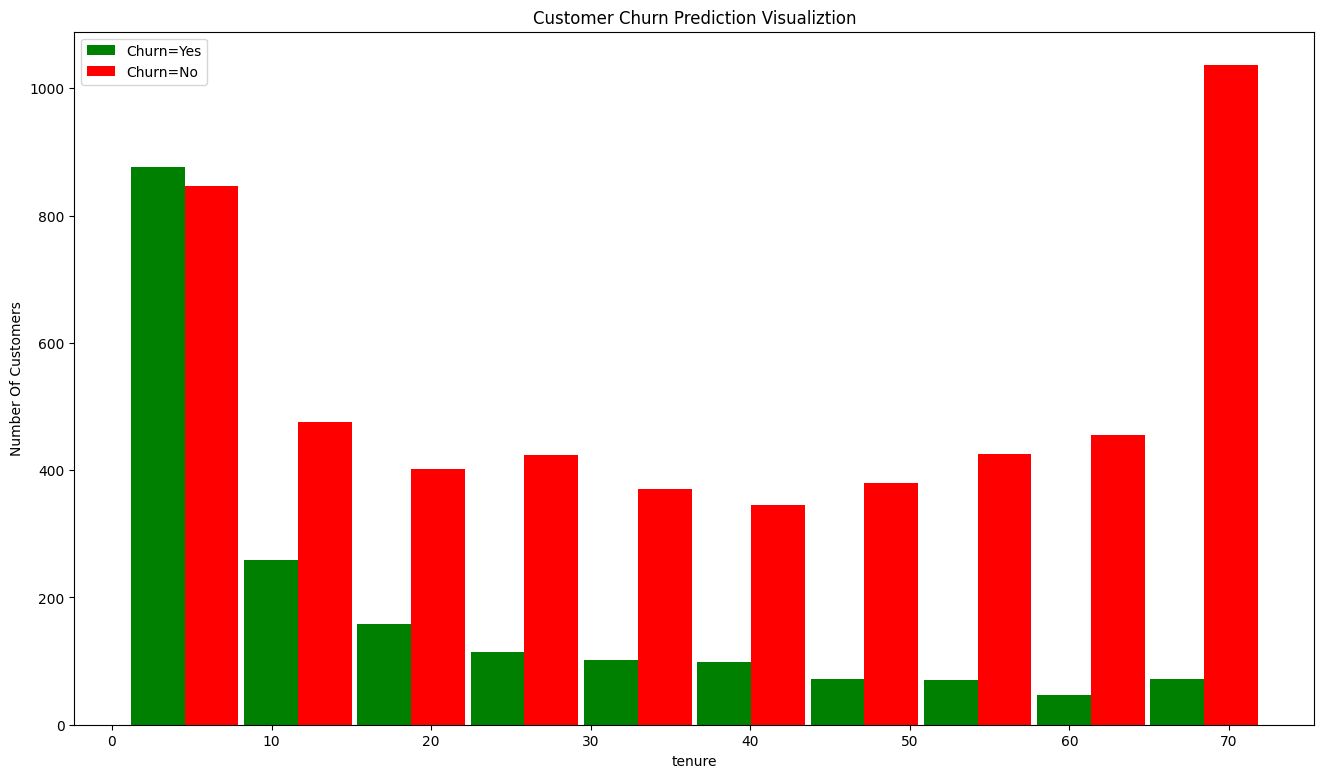

In [14]:
# Creating variables for customers who are not leaving and customers who are leaving


tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure


# Creating the plot
plt.figure(figsize=(16, 9))
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()
plt.show()

**Notes:**

- So we can see that with increase in tenure the number of customers leaving is decreasing.

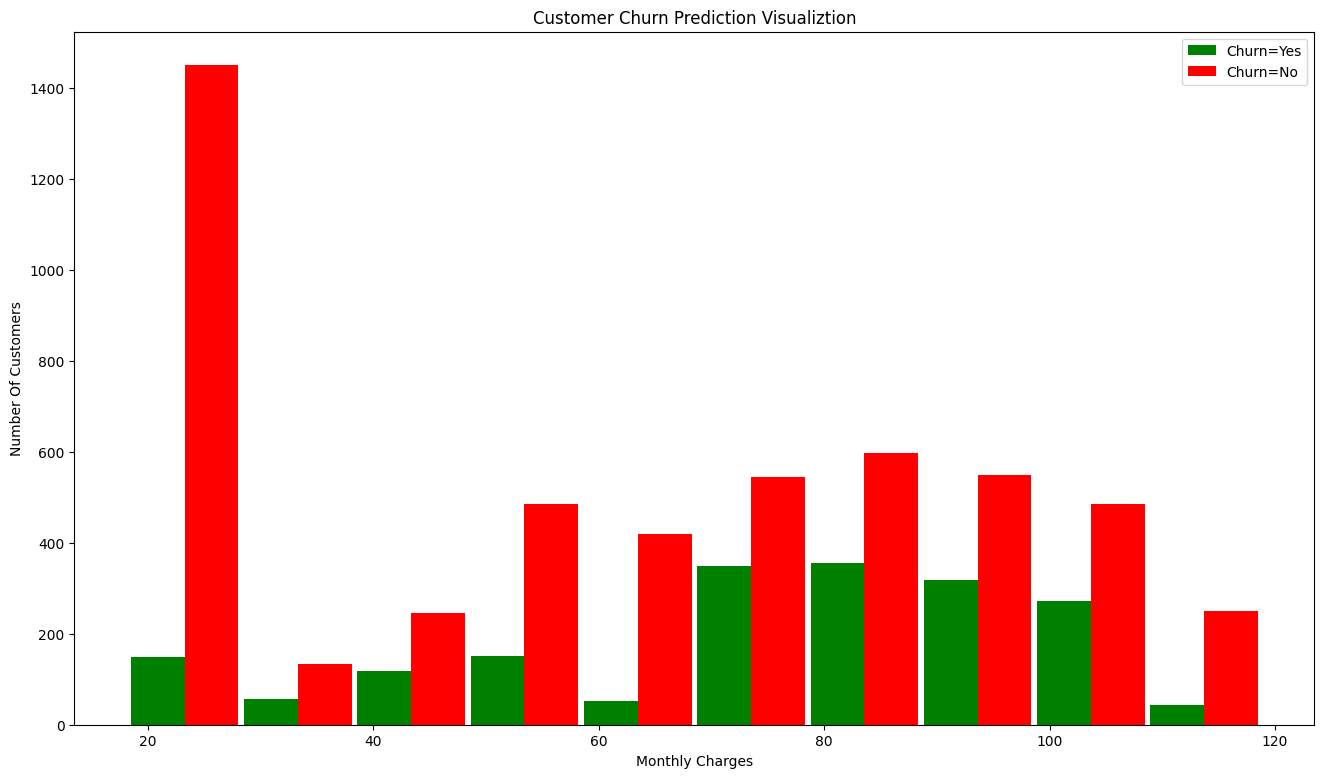

In [15]:
# Let's do the same plotting with Monthly Charges

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.figure(figsize=(16, 9))
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()
plt.show()

**Notes:**

- Here we can see customers of all kind of monthly charges are leaving. This is not good for the company.

**Many of the columns are `yes`, `no` etc. Let's print unique values in object columns to see data values**

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
                
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Notes:**

- Some of the columns have `No internet service` or `No phone service`, that can be replaced with a simple `No`.

In [17]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

# Again checking
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


- **Now converting `Yes` and `No` to `1` or `0`**
- **Also replace in the `gender` column `Female` and `Male` with `1` and `0`**

In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

In [19]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [20]:
# Let's see the unique values again

for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


#### `Data Preproceesing`

- Here we will use `Minmaxscaler` on `tenure`,`MonthlyCharges`,`TotalCharges` columns.
- Here we want the values of these columns between `0` and `1` range.

In [21]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']


scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [22]:
# Let's see the unique values again

for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: 

### Now doing train test split

In [23]:
from sklearn.model_selection import train_test_split

X = df1.drop('Churn',axis='columns')
y = df1['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.shape, X_test.shape

((5625, 19), (1407, 19))

In [24]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5486,0,0,0,0,0.746479,1,1,DSL,1,0,1,1,1,1,Two year,0,Bank transfer (automatic),0.685075,0.544242
5149,1,0,0,0,0.859155,1,0,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),0.009453,0.127492
1074,0,0,0,0,0.000000,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,0.028358,0.000265
6621,1,0,1,1,0.633803,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),0.011443,0.108395
6503,0,0,1,1,0.971831,0,0,DSL,0,1,1,1,1,1,One year,0,Electronic check,0.418905,0.475410


In [25]:
y_train.head()

5664    1
101     0
2621    0
392     0
1327    1
Name: Churn, dtype: int64

In [26]:
y_train.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

In [27]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

**Now using `One Hot Encoding` let's code the categorical data**

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
one_hot_columns = ['InternetService','Contract','PaymentMethod']

oh_transformer = OneHotEncoder(sparse=False, drop='first')

transformer = ColumnTransformer(transformers=
                                [
                                    ("OneHotEncoder", oh_transformer, one_hot_columns)
                                ], remainder='passthrough')


# Now doing fit and transform on train and test data

X_train_tf = transformer.fit_transform(X_train)
X_test_tf = transformer.transform(X_test)

In [30]:
X_train_tf

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.60199005e-01, 9.77094392e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.19402985e-02, 7.50057697e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.05472637e-01, 6.39978075e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.06467662e-01, 6.21174706e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.58706468e-02, 1.64839603e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.65174129e-01, 7.08123702e-01]])

In [31]:
# Creating dataframe of the training set

df3 = pd.DataFrame(X_train_tf)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.660199,0.097709
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011940,0.000075
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.605473,0.639978
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259204,0.008135
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.808458,0.685703


In [32]:
# Checking number of columns

len(df3.columns)

23

### Now building an `ANN` model

- Need to add `!pip install tensorflow-addons`

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow_addons import losses
from sklearn.metrics import confusion_matrix , classification_report

In [37]:
# Creating a function to create an ANN model
# Here we will have 23 neurons at input layer as we have 23 features
# Here by default the batch size is 32

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(23, input_dim=23, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [39]:
# Checking the predictions

y_preds = ANN(X_train_tf, y_train, X_test_tf, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7076
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7920
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8043
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8274
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8283
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8283
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8318
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8284
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8292
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8300
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8302
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8283
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 

**Notes:**

- Here also we can see that the `f1 score` for the class `1` is very low i.e. `0.60`.
- Here class `1` is the number of customers who are leaving the business. And for them `precision`, `recall` and `f1 score` is not high.
- Now the goal is to improve the `f1 score` for both of the classes, so the model can predict equally well for both these classes.

In [40]:
# Checking the number of outcomes in the test sample

y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

**Notes:**

- As we can see the `0`th class having `999` and `1`th class having `408` samples so it is an **imbalanced** dataset.

### Method 1: Undersampling
#### Mitigating Skewdness of Data


- Here we will take only `408` samples of the `0`th class and train the model.

In [41]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
# '0' samples are in "df_class_0" and '1' samples are is "df_class_1" dataframes
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [42]:
# Checking the shapes

df_class_0.shape, df_class_1.shape

((5163, 20), (1869, 20))

In [43]:
# Number of count classes

count_class_0, count_class_1

(5163, 1869)

**Notes:**

- Here also we can see **Imbalance** as one class has `5163` samples where the other class has `1869` samples.
- So now we will **Under sample** the `df_class_0` class.
- So here we want to make sample of `0` for the amount of `count_class_1`.
- As a result the new dataframe will have `1869` samples.
- Then we need to concatinate the two dataframes and create a new dataframe with same number of classes for both the classes.

In [44]:
# Undersample 0-class and concat the DataFrames of both class

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [45]:
# Again doing test train split.
# The "stratify" argument is passes to make sure that we have a balanced sample.

X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
# Checking whether we have same number of samples from both the classes

y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [48]:
# Again doing One Hot encoding for the categorical features

one_hot_columns = ['InternetService','Contract','PaymentMethod']

oh_transformer = OneHotEncoder(sparse=False, drop='first')

transformer = ColumnTransformer(transformers=
                                [
                                    ("OneHotEncoder", oh_transformer, one_hot_columns)
                                ], remainder='passthrough')


# Now doing fit and transform on train and test data

X_train_tf = transformer.fit_transform(X_train)
X_test_tf = transformer.transform(X_test)

In [49]:
# Now creating model and checking predictions

y_preds = ANN(X_train_tf, y_train, X_test_tf, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6140 - accuracy: 0.6756
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7391
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7736
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7776
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8117
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8070
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8090
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8087
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8130
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8077
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8070
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8137
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8097
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8110
Epoch 93/100


**Notes:**

- Now we can see that the `precision`, `recall` and `f1 score` have improved.

### Method2: Oversampling

- Here we will oversample the dataframe of `1` class.

In [50]:
# Oversample 1-class and concat the DataFrames of both classes

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [51]:
# Again doing test train split.
# The "stratify" argument is passes to make sure that we have a balanced sample.

X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [52]:
# Number of classes in training Data

y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [53]:
# Again doing One Hot encoding for the categorical features

one_hot_columns = ['InternetService','Contract','PaymentMethod']

oh_transformer = OneHotEncoder(sparse=False, drop='first')

transformer = ColumnTransformer(transformers=
                                [
                                    ("OneHotEncoder", oh_transformer, one_hot_columns)
                                ], remainder='passthrough')


# Now doing fit and transform on train and test data

X_train_tf = transformer.fit_transform(X_train)
X_test_tf = transformer.transform(X_test)

In [54]:
# Now creating model and checking predictions

y_preds = ANN(X_train_tf, y_train, X_test_tf, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7188
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4918 - accuracy: 0.7628
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.7642
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4844 - accuracy: 0.7628
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.7683
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7697
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4752 - accuracy: 0.7715
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.7729
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.7743
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4690 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3935 - accuracy: 0.8240
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8249
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8260
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8255
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8252
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8242
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8237
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8249
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3917 - accuracy: 0.8235
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 

**Notes:**

- Now the `f1 score` of class `1` has more improvements.

### Method3: SMOTE

- To install imbalanced-learn library use `!pip install imbalanced-learn` command.

In [55]:
# Original dataframe

df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4301,0,0,1,1,0.915493,1,0,No,0,0,0,0,0,0,Two year,1,Mailed check,0.014925,0.152977,0
6706,1,0,0,0,0.000000,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,0.016418,0.000127,0
708,0,0,1,0,0.394366,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Credit card (automatic),0.567662,0.259012,0
2242,0,0,1,1,0.605634,1,1,No,0,0,0,0,0,0,One year,0,Electronic check,0.065672,0.114793,0
553,1,0,1,1,0.309859,1,1,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),0.073134,0.057229,0


In [59]:
# Let's create a dataframe which will be One hot encoded so we don't need to do the encoding each time

# Again doing One Hot encoding for the categorical features

one_hot_columns = ['InternetService','Contract','PaymentMethod']

oh_transformer = OneHotEncoder(sparse=False, drop='first')

transformer = ColumnTransformer(transformers=
                                [
                                    ("OneHotEncoder", oh_transformer, one_hot_columns)
                                ], remainder='passthrough')


# Now doing fit and transform on the dataset
transformed_data = transformer.fit_transform(df1)

# Creating dataframe of the training set
df_final = pd.DataFrame(transformed_data)

In [60]:
# Checking the dataframe

df_final.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
6124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.066169,0.003566,0.0
4428,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.421393,0.147588,0.0
4205,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.719900,0.008285,1.0
6620,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.655224,0.705152,0.0
3666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.516418,0.426592,1.0


In [80]:
# Creating independent and dependent features

X = df_final.loc[:, :22]
y = df_final.loc[:, 23]

In [81]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330


In [83]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: 23, dtype: float64

In [85]:
# Now using the "SMOTE"

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [86]:
# Checking the value counts in y variable

y_sm.value_counts()

0.0    5163
1.0    5163
Name: 23, dtype: int64

In [87]:
# Now doing train test split
# Here we will use the "y_sm" as stratify to make the data balanced

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [88]:
# Number of classes in training Data

y_train.value_counts()

1.0    4130
0.0    4130
Name: 23, dtype: int64

In [89]:
# Now creating model and checking predictions

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7380
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.7711
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7745
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7772
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7815
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4592 - accuracy: 0.7816
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4554 - accuracy: 0.7858
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.7879
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.7879
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4455 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.8298
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8318
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8318
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3743 - accuracy: 0.8314
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8320
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3725 - accuracy: 0.8315
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8351
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8354
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8340
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3703 - accuracy: 

**Notes:**

- Here we can see `0.79` for both the classes.

### Method4: Use of `Ensemble` with undersampling

In [90]:
# Doing train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [91]:
# Checking imbalances

y_train.value_counts()

0.0    4130
1.0    1495
Name: 23, dtype: int64

In [92]:
# Creating a dataframe

df3 = X_train.copy()
df3['Churn'] = y_train

df3.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Churn
683,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.525871,0.006035,0.0
2441,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.713930,0.174077,1.0
1675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061692,0.163034,0.0
2215,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.607960,0.661718,0.0
2837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.298507,0.021169,0.0


In [93]:
# Creating class0 and class1 dataframes

df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [94]:
df3_class0.shape, df3_class1.shape

((4130, 24), (1495, 24))

- So we can create 3 batches by using the `sample()` like:
> df3.sample(1495)

- Or we can do the following

In [95]:
# Now in ensemble we will create 3 batches out of the majority class

def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [96]:
# Here creating 3 batches and then do the prediction for the first batch

X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6715 - accuracy: 0.6010
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7485
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7686
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7716
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7699
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7783
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8137
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8144
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8181
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8177
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8164
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8211
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8204
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8194
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8194
Epoch 93/100


In [97]:
# Here doing the prediction for the second batch

X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6808 - accuracy: 0.5819
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7448
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7729
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7742
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.8184
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8144
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8157
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8207
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8130
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8211
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8151
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8167
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8191
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8194
Epoch 93/100


In [98]:
# Here doing the prediction for the third batch

X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6558 - accuracy: 0.6448
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7370
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7658
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7662
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7803
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7765
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7841
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.7822
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.7860
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8231
Epoch 84/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8205
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8239
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8258
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8224
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8231
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8213
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8254
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8285
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8277
Epoch 93/100


In [99]:
print("The length of the first batch is: ",len(y_pred1))
print("The length of the second batch is: ",len(y_pred2))
print("The length of the third batch is: ",len(y_pred3))

The length of the first batch is:  1407
The length of the second batch is:  1407
The length of the third batch is:  1407


In [105]:
# Prediction of the 100 index of the 1st batch

y_pred1[100]

array([0.], dtype=float32)

In [106]:
# Prediction of the 100 index of the 2nd batch

y_pred2[100]

array([0.], dtype=float32)

In [107]:
# Prediction of the 100 index of the 3rd batch

y_pred3[100]

array([1.], dtype=float32)

In [108]:
# So the total vote for the 100th index in all the 3 batches will be

res = y_pred1[100] + y_pred2[100] + y_pred3[100]

print("So the total vote for the 100th index in all the 3 batches will be: ", res)

So the total vote for the 100th index in all the 3 batches will be:  [1.]


In [109]:
# So now we will create a numpy array of the prediction of first batch
# Then we will run a loop and store the values of each index for each batch
# Now applying above logic if the total value of an index in all the 3 batches are more than 12 then we will consider it as 1
# Else it will be considered as 0

y_pred_final = y_pred1.copy()


for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [110]:
# Now making classification report

cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      1033
         1.0       0.48      0.81      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407

